In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris_data = load_iris()

# 데이터 셋 dataframe에 저장
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns = ['class'])

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [6]:
model = RandomForestClassifier(n_estimators=100, max_depth=4)
# 옵셔널 파라미터  n_estimators = 결정트리 갯수, max_depth = 최대 깊이

In [7]:
model.fit(X_train, y_train)     # 모델 학습

RandomForestClassifier(max_depth=4)

In [8]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [9]:
model.score(X_test, y_test)     # 모델 성능 평가

0.9

In [10]:
importances = model.feature_importances_

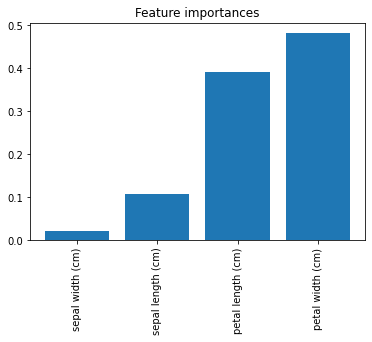

In [11]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()